In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [2]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://jupyter-tutorial.readthedocs.io/en/latest/', 78705)
('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://cusy.io/en', 30232)
('https://github.com/veit/pyviz-tutorial/', 193595)
('https://github.com/veit/jupyter-tutorial/', 223395)


In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  3
index  3
SI
irandom  1
index  4
SI
irandom  1
index  5
SI
irandom  3
index  8
Program finished in 0.001628599944524467 seconds - using serial


In [5]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

3492368

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

3492368

In [10]:
array_Ytrain

array([[0.35434783],
       [0.34130435],
       [0.35869565],
       ...,
       [0.7       ],
       [0.69565217],
       [0.69130435]])

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

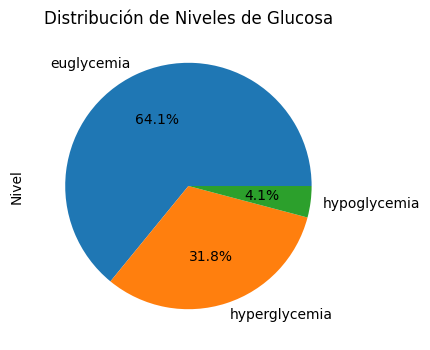

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2238342
hyperglycemia    1110305
hypoglycemia      143721
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,197.0,hyperglycemia
2,205.0,hyperglycemia
3,209.0,hyperglycemia
4,204.0,hyperglycemia
...,...,...
3492363,361.0,hyperglycemia
3492364,364.0,hyperglycemia
3492365,362.0,hyperglycemia
3492366,360.0,hyperglycemia


In [15]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

34924


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 33669
Program finished in 1.372125199995935 seconds - using multiprocessing
1 67598
Program finished in 1.1976568999816664 seconds - using multiprocessing
2 101781
Program finished in 1.046671200019773 seconds - using multiprocessing
3 134958
Program finished in 2.1740564000210725 seconds - using multiprocessing
4 169240
Program finished in 1.2206680999952368 seconds - using multiprocessing
5 203632
Program finished in 1.3523592000128701 seconds - using multiprocessing
6 235306
Program finished in 3.893404299975373 seconds - using multiprocessing
7 266361
Program finished in 4.286935900046956 seconds - using multiprocessing
8 296661
Program finished in 4.9559297999949194 seconds - using multiprocessing
9 326305
Program finished in 5.831597900018096 seconds - using multiprocessing
10 356171
Program finished in 5.453797099995427 seconds - using multiprocessing
11 387149
Program finished in 4.585865999979433 seconds - using multiprocessing
12 417535
Program finished in 5.652817599999253

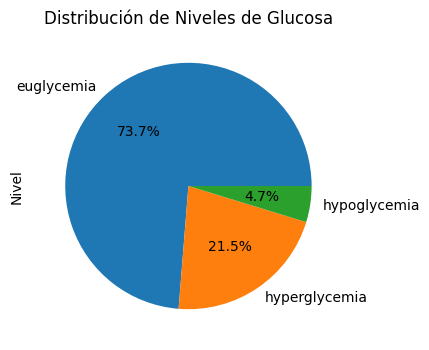

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2238342
hyperglycemia     653807
hypoglycemia      143721
Name: Nivel, dtype: int64

<AxesSubplot: >

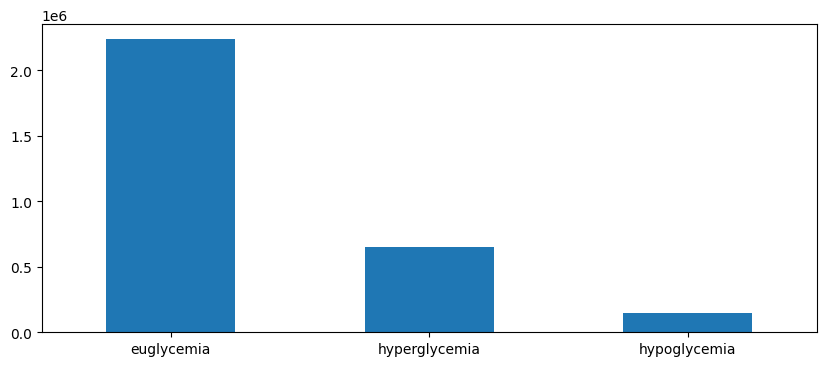

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

3035870

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [26]:
len(YNew)

3035870

In [27]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

30359


In [28]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 19470
Program finished in 8.281211199995596 seconds - using multiprocessing
1 38631
Program finished in 13.940253100008704 seconds - using multiprocessing
2 57483
Program finished in 11.380132300022524 seconds - using multiprocessing
3 76096
Program finished in 11.959211000008509 seconds - using multiprocessing
4 95303
Program finished in 12.134613299975172 seconds - using multiprocessing
5 113925
Program finished in 13.957857400004286 seconds - using multiprocessing
6 132416
Program finished in 14.774524200009182 seconds - using multiprocessing
7 153466
Program finished in 11.557259499968495 seconds - using multiprocessing
8 174964
Program finished in 9.392037999990862 seconds - using multiprocessing
9 196855
Program finished in 9.935251799994148 seconds - using multiprocessing
10 218843
Program finished in 10.29144240001915 seconds - using multiprocessing
11 240413
Program finished in 9.064533400000073 seconds - using multiprocessing
12 261538
Program finished in 10.67744290002156 

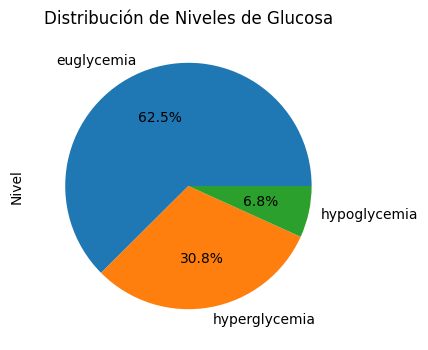

In [29]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [30]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1327110
hyperglycemia     653807
hypoglycemia      143721
Name: Nivel, dtype: int64

In [31]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

21247


In [32]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 14024
Program finished in 4.650110799993854 seconds - using multiprocessing
1 27796
Program finished in 4.30421730002854 seconds - using multiprocessing
2 41216
Program finished in 4.526322199963033 seconds - using multiprocessing
3 55234
Program finished in 4.454646300000604 seconds - using multiprocessing
4 68381
Program finished in 4.618901500012726 seconds - using multiprocessing
5 81432
Program finished in 4.665478299953975 seconds - using multiprocessing
6 96364
Program finished in 3.8613595999777317 seconds - using multiprocessing
7 112345
Program finished in 3.6715780000085942 seconds - using multiprocessing
8 128343
Program finished in 3.4093824999872595 seconds - using multiprocessing
9 145020
Program finished in 3.083523300010711 seconds - using multiprocessing
10 161275
Program finished in 3.3519512999919243 seconds - using multiprocessing
11 177018
Program finished in 3.667594900005497 seconds - using multiprocessing
12 192387
Program finished in 4.078988399996888 second

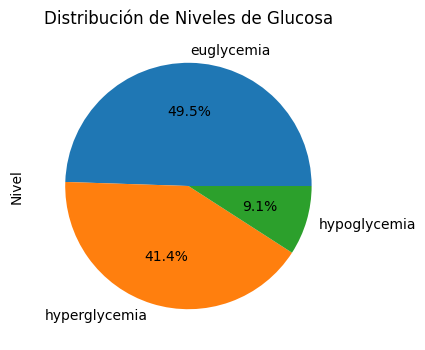

In [33]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [34]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       781046
hyperglycemia    653807
hypoglycemia     143721
Name: Nivel, dtype: int64

In [35]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [36]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [37]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

15786
0 10972
Program finished in 2.6982328000012785 seconds - using multiprocessing
1 21514
Program finished in 3.6584246000275016 seconds - using multiprocessing
2 32470
Program finished in 3.995291300001554 seconds - using multiprocessing
3 42616
Program finished in 4.206996500026435 seconds - using multiprocessing
4 52353
Program finished in 3.9261886999593116 seconds - using multiprocessing
5 63953
Program finished in 3.595180599950254 seconds - using multiprocessing
6 76533
Program finished in 2.7637013999628834 seconds - using multiprocessing
7 89227
Program finished in 2.5020820000208914 seconds - using multiprocessing
8 102454
Program finished in 1.9250908000394702 seconds - using multiprocessing
9 115412
Program finished in 2.192291200044565 seconds - using multiprocessing
10 127971
Program finished in 2.6054589000414126 seconds - using multiprocessing
11 140127
Program finished in 3.61080480000237 seconds - using multiprocessing
12 152207
Program finished in 3.21726939996005

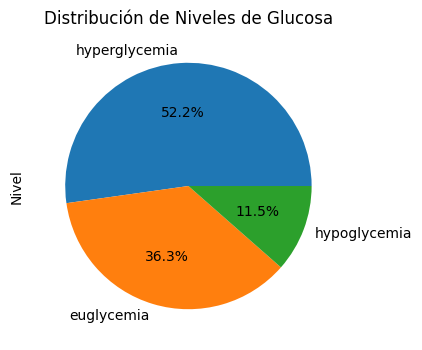

In [38]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    653807
euglycemia       454302
hypoglycemia     143721
Name: Nivel, dtype: int64

In [40]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

12519
0 11637
Program finished in 0.7339287999784574 seconds - using multiprocessing
1 22832
Program finished in 0.9695341000333428 seconds - using multiprocessing
2 34593
Program finished in 0.7015760000213049 seconds - using multiprocessing
3 46803
Program finished in 0.45532329997513443 seconds - using multiprocessing
4 57484
Program finished in 1.6337341000325978 seconds - using multiprocessing
5 68035
Program finished in 1.8191676000133157 seconds - using multiprocessing
6 78008
Program finished in 2.16510120005114 seconds - using multiprocessing
7 87877
Program finished in 2.435209799965378 seconds - using multiprocessing
8 97336
Program finished in 2.620479900040664 seconds - using multiprocessing
9 107507
Program finished in 1.9506630000541918 seconds - using multiprocessing
10 117348
Program finished in 2.1500239999732003 seconds - using multiprocessing
11 127343
Program finished in 1.916890799999237 seconds - using multiprocessing
12 136845
Program finished in 2.1049246999900

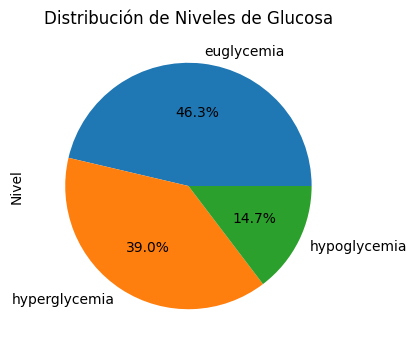

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       454302
hyperglycemia    382695
hypoglycemia     143721
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

9808
0 7022
Program finished in 1.1813094999524765 seconds - using multiprocessing
1 13740
Program finished in 1.312746600015089 seconds - using multiprocessing
2 20650
Program finished in 1.2625846999580972 seconds - using multiprocessing
3 26963
Program finished in 1.4265789999626577 seconds - using multiprocessing
4 33076
Program finished in 1.6560521999490447 seconds - using multiprocessing
5 40350
Program finished in 1.2970634999801405 seconds - using multiprocessing
6 48297
Program finished in 0.9350464000017382 seconds - using multiprocessing
7 56438
Program finished in 0.9536270999815315 seconds - using multiprocessing
8 64727
Program finished in 0.8608824000111781 seconds - using multiprocessing
9 72916
Program finished in 0.9956834000186063 seconds - using multiprocessing
10 81009
Program finished in 1.0170768999960274 seconds - using multiprocessing
11 88655
Program finished in 1.7186602999572642 seconds - using multiprocessing
12 96310
Program finished in 2.0205294999759644

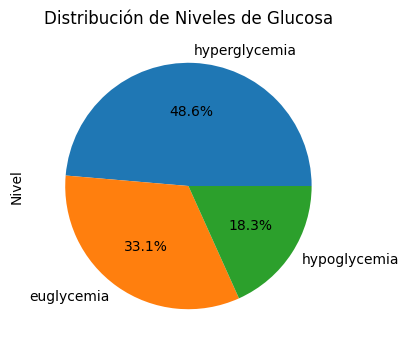

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    382695
euglycemia       260294
hypoglycemia     143721
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7868
0 7383
Program finished in 0.33682280004723 seconds - using multiprocessing
1 14524
Program finished in 0.23829410003963858 seconds - using multiprocessing
2 21869
Program finished in 0.21083009999711066 seconds - using multiprocessing
3 29557
Program finished in 0.2073001000098884 seconds - using multiprocessing
4 36396
Program finished in 0.39259150001453236 seconds - using multiprocessing
5 43152
Program finished in 0.6018950000288896 seconds - using multiprocessing
6 49619
Program finished in 0.6839347000350244 seconds - using multiprocessing
7 56006
Program finished in 0.7444114999962039 seconds - using multiprocessing
8 62060
Program finished in 0.8793181999935769 seconds - using multiprocessing
9 68660
Program finished in 0.7821630000253208 seconds - using multiprocessing
10 74782
Program finished in 0.9931679999572225 seconds - using multiprocessing
11 81210
Program finished in 0.8479983000434004 seconds - using multiprocessing
12 87242
Program finished in 0.94573249999666

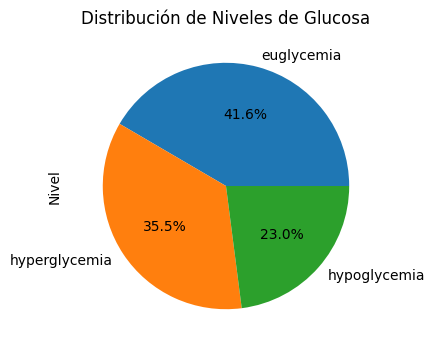

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [50]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       260294
hyperglycemia    221951
hypoglycemia     143721
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

Cargamos nuevamente para evitar perder todo el trabajo debido a la demora del proceso

In [53]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [54]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [55]:
len(array_Xtrain)

625966

In [56]:
len(array_Ytrain)

625966

In [57]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

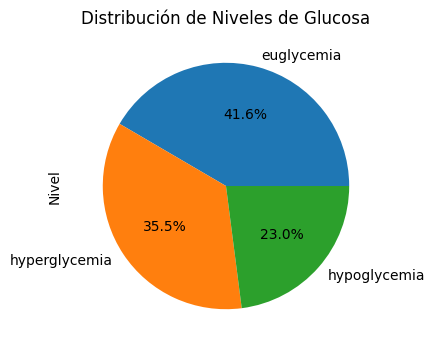

In [58]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [59]:
df_Y_scaled

,Glucose level,Nivel
0,87.185185,euglycemia
1,89.108025,euglycemia
2,93.777778,euglycemia
3,94.876543,euglycemia
4,96.799383,euglycemia
...,...,...
625961,196.350487,hyperglycemia
625962,196.389455,hyperglycemia
625963,196.418681,hyperglycemia
625964,196.447907,hyperglycemia


In [60]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       260294
hyperglycemia    221951
hypoglycemia     143721
Name: Nivel, dtype: int64

In [61]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

6260
0 4730
Program finished in 0.2838688000338152 seconds - using multiprocessing
1 9219
Program finished in 0.41786540002794936 seconds - using multiprocessing
2 13770
Program finished in 0.46172879997175187 seconds - using multiprocessing
3 17961
Program finished in 0.6918896999559365 seconds - using multiprocessing
4 21943
Program finished in 0.7126842999714427 seconds - using multiprocessing
5 26837
Program finished in 0.50726369995391 seconds - using multiprocessing
6 32080
Program finished in 0.44920060003641993 seconds - using multiprocessing
7 37489
Program finished in 0.47515569999814034 seconds - using multiprocessing
8 42913
Program finished in 0.5129983999649994 seconds - using multiprocessing
9 48368
Program finished in 0.651790699979756 seconds - using multiprocessing
10 53725
Program finished in 0.6073604999692179 seconds - using multiprocessing
11 58837
Program finished in 0.6751096000079997 seconds - using multiprocessing
12 63804
Program finished in 0.786744299985002

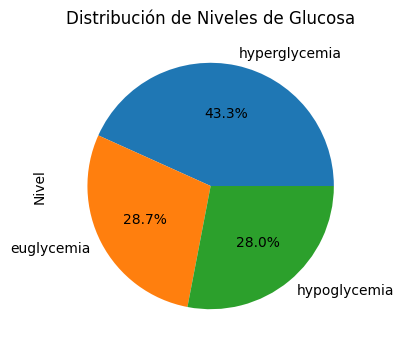

In [62]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [63]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    221951
euglycemia       147346
hypoglycemia     143721
Name: Nivel, dtype: int64

<AxesSubplot: >

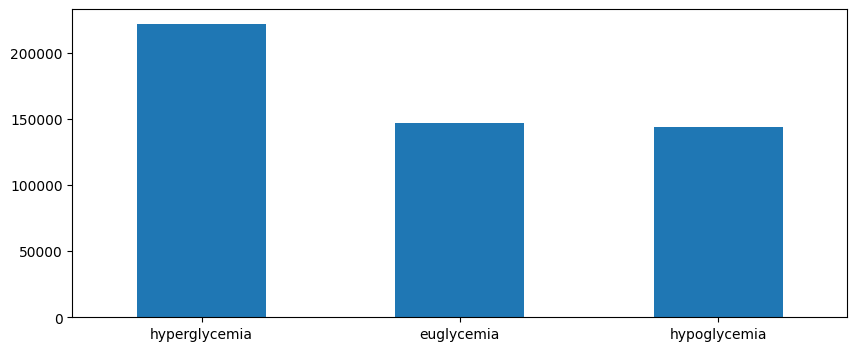

In [64]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [65]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [66]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

In [67]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [68]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [69]:
len(array_Xtrain)

513018

In [70]:
len(array_Ytrain)

513018

In [71]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

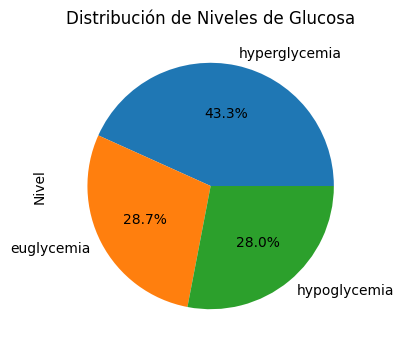

In [72]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [73]:
df_Y_scaled

,Glucose level,Nivel
0,64.0,hypoglycemia
1,67.0,hypoglycemia
2,68.0,hypoglycemia
3,60.0,hypoglycemia
4,53.0,hypoglycemia
...,...,...
513013,197.0,hyperglycemia
513014,138.0,euglycemia
513015,130.0,euglycemia
513016,104.0,euglycemia


In [74]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    221951
euglycemia       147346
hypoglycemia     143721
Name: Nivel, dtype: int64

In [75]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

5131
0 4983
Program finished in 0.10309009999036789 seconds - using multiprocessing
1 9887
Program finished in 0.05652909999480471 seconds - using multiprocessing
2 14754
Program finished in 0.08838700002525002 seconds - using multiprocessing
3 19824
Program finished in 0.1078304999973625 seconds - using multiprocessing
4 24593
Program finished in 0.16285029996652156 seconds - using multiprocessing
5 29327
Program finished in 0.20129759999690577 seconds - using multiprocessing
6 33944
Program finished in 0.2345534999622032 seconds - using multiprocessing
7 38590
Program finished in 0.26750060002086684 seconds - using multiprocessing
8 43067
Program finished in 0.3299155000131577 seconds - using multiprocessing
9 47684
Program finished in 0.38132909999694675 seconds - using multiprocessing
10 52163
Program finished in 0.4829987999983132 seconds - using multiprocessing
11 56744
Program finished in 0.5008825000259094 seconds - using multiprocessing
12 61138
Program finished in 0.497664599

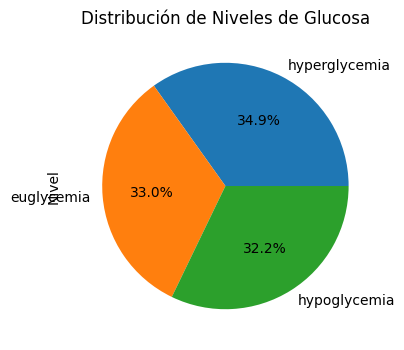

In [76]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [77]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    155807
euglycemia       147346
hypoglycemia     143721
Name: Nivel, dtype: int64

In [78]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'wb') as f:
    np.save(f, XNew)

In [79]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [91]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [92]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [93]:
len(array_Ytrain)

446874

In [94]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

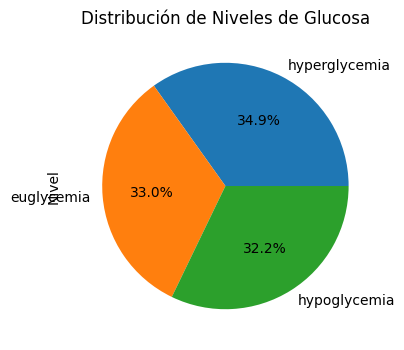

In [95]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [96]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    155807
euglycemia       147346
hypoglycemia     143721
Name: Nivel, dtype: int64

In [97]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [98]:
minClass

143721

In [99]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

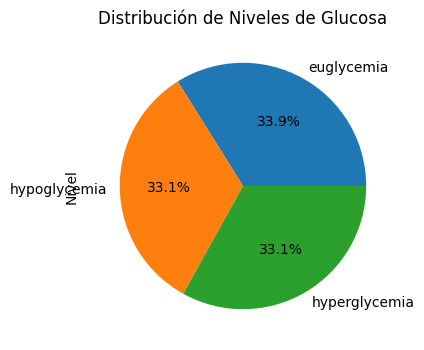

In [100]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [101]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       147346
hypoglycemia     143721
hyperglycemia    143721
Name: Nivel, dtype: int64

In [102]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

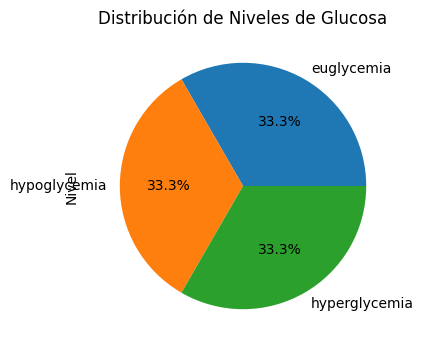

In [103]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [104]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       143721
hypoglycemia     143721
hyperglycemia    143721
Name: Nivel, dtype: int64

<AxesSubplot: >

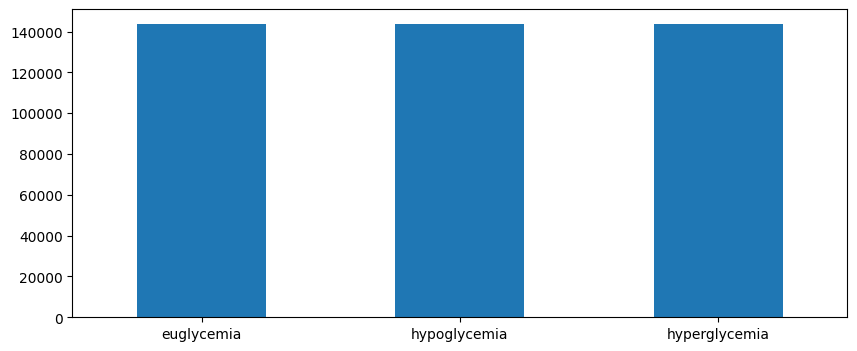

In [105]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [106]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [107]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [108]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [109]:
len(array_Xval)

436549

In [110]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [111]:
len(array_Yval)

436549

In [112]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

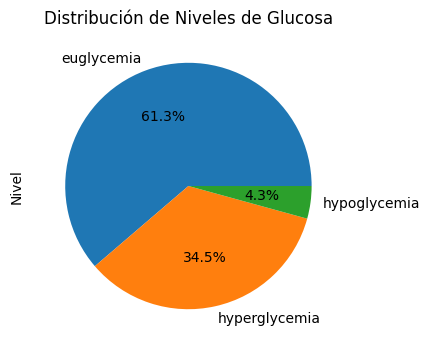

In [113]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [114]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       267505
hyperglycemia    150402
hypoglycemia      18642
Name: Nivel, dtype: int64

<AxesSubplot: >

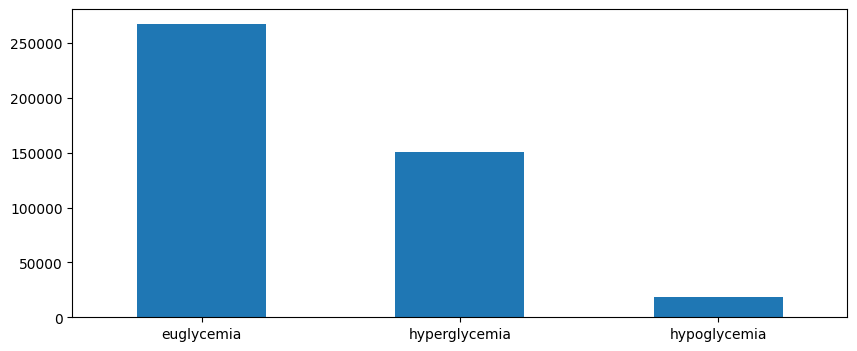

In [115]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [116]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

4366


In [117]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 2795
Program finished in 0.6966930999769829 seconds - using multiprocessing
1 5537
Program finished in 0.6206502999993972 seconds - using multiprocessing
2 8274
Program finished in 0.5698780999518931 seconds - using multiprocessing
3 10948
Program finished in 0.5726517000002787 seconds - using multiprocessing
4 13656
Program finished in 0.5699671999900602 seconds - using multiprocessing
5 16394
Program finished in 0.6026529999799095 seconds - using multiprocessing
6 19565
Program finished in 0.4636239999672398 seconds - using multiprocessing
7 22978
Program finished in 0.40406929998425767 seconds - using multiprocessing
8 26232
Program finished in 0.4693011000053957 seconds - using multiprocessing
9 29309
Program finished in 0.5668255999917164 seconds - using multiprocessing
10 32572
Program finished in 0.4291367999976501 seconds - using multiprocessing
11 35795
Program finished in 0.5406038000364788 seconds - using multiprocessing
12 38922
Program finished in 0.5218407000065781 seco

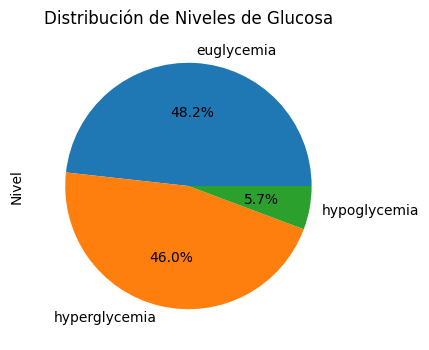

In [118]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [119]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       157589
hyperglycemia    150402
hypoglycemia      18642
Name: Nivel, dtype: int64

In [120]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [121]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [122]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3267
0 2117
Program finished in 0.18922699999529868 seconds - using multiprocessing
1 4236
Program finished in 0.2007099000038579 seconds - using multiprocessing
2 6273
Program finished in 0.24489870003890246 seconds - using multiprocessing
3 8333
Program finished in 0.24585230002412573 seconds - using multiprocessing
4 10417
Program finished in 0.2455883999937214 seconds - using multiprocessing
5 12896
Program finished in 0.20699059998150915 seconds - using multiprocessing
6 15619
Program finished in 0.19593970000278205 seconds - using multiprocessing
7 18276
Program finished in 0.2198126000002958 seconds - using multiprocessing
8 20756
Program finished in 0.27789530000882223 seconds - using multiprocessing
9 23391
Program finished in 0.2450671999831684 seconds - using multiprocessing
10 25977
Program finished in 0.2820894000469707 seconds - using multiprocessing
11 28468
Program finished in 0.33420400001341477 seconds - using multiprocessing
12 30962
Program finished in 0.37350019998

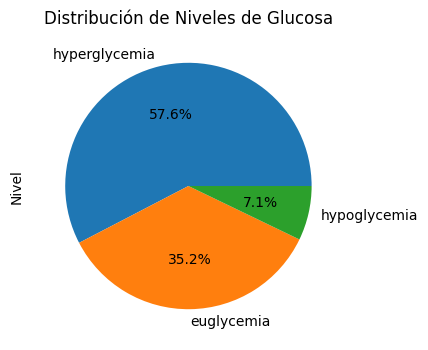

In [123]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [124]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    150402
euglycemia        91932
hypoglycemia      18642
Name: Nivel, dtype: int64

In [125]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2610
0 2510
Program finished in 0.1782919999677688 seconds - using multiprocessing
1 5012
Program finished in 0.0947114999871701 seconds - using multiprocessing
2 7541
Program finished in 0.1369433999643661 seconds - using multiprocessing
3 9946
Program finished in 0.18411659996490926 seconds - using multiprocessing
4 11990
Program finished in 0.2965567000210285 seconds - using multiprocessing
5 13880
Program finished in 0.328290100034792 seconds - using multiprocessing
6 15840
Program finished in 0.3311305000097491 seconds - using multiprocessing
7 17914
Program finished in 0.3540235999971628 seconds - using multiprocessing
8 19871
Program finished in 0.371720600000117 seconds - using multiprocessing
9 21962
Program finished in 0.38006270001642406 seconds - using multiprocessing
10 23965
Program finished in 0.41584679996594787 seconds - using multiprocessing
11 25980
Program finished in 0.39898290002020076 seconds - using multiprocessing
12 28060
Program finished in 0.4227046999731101

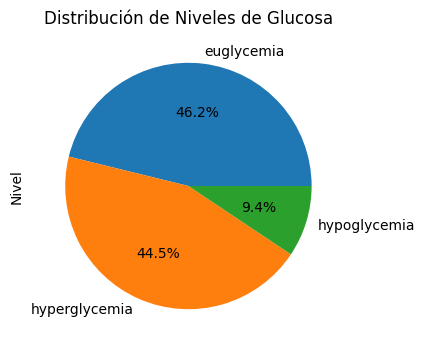

In [126]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [127]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       91932
hyperglycemia    88582
hypoglycemia     18642
Name: Nivel, dtype: int64

In [128]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [129]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [130]:
len(XNew)

199156

<AxesSubplot: >

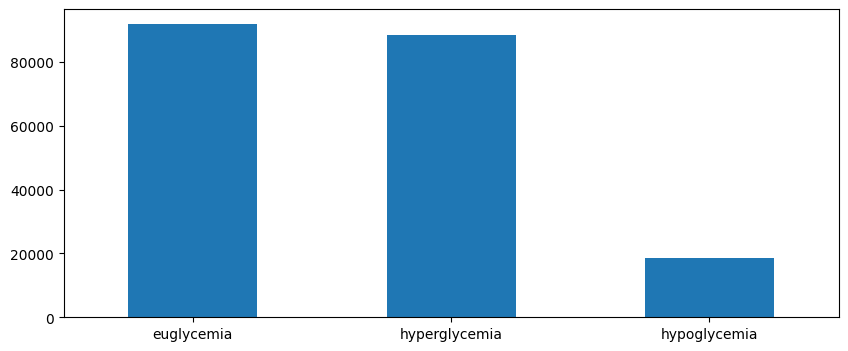

In [131]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [132]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1992
0 1356
Program finished in 0.26039390004007146 seconds - using multiprocessing
1 2687
Program finished in 0.21268470003269613 seconds - using multiprocessing
2 3971
Program finished in 0.23164080001879483 seconds - using multiprocessing
3 5215
Program finished in 0.24084720003884286 seconds - using multiprocessing
4 6488
Program finished in 0.28229179995832965 seconds - using multiprocessing
5 8053
Program finished in 0.21008969994727522 seconds - using multiprocessing
6 9702
Program finished in 0.1951204999932088 seconds - using multiprocessing
7 11281
Program finished in 0.22684529999969527 seconds - using multiprocessing
8 12791
Program finished in 0.2577506999950856 seconds - using multiprocessing
9 14403
Program finished in 0.23203410004498437 seconds - using multiprocessing
10 15982
Program finished in 0.28631650004535913 seconds - using multiprocessing
11 17519
Program finished in 0.27904679998755455 seconds - using multiprocessing
12 18999
Program finished in 0.30652280000

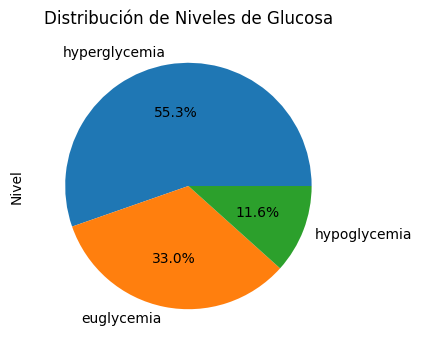

In [133]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [134]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    88582
euglycemia       52834
hypoglycemia     18642
Name: Nivel, dtype: int64

In [135]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1601
0 1563
Program finished in 0.07274660002440214 seconds - using multiprocessing
1 3100
Program finished in 0.05280599999241531 seconds - using multiprocessing
2 4642
Program finished in 0.057014299964066595 seconds - using multiprocessing
3 6128
Program finished in 0.08120259997667745 seconds - using multiprocessing
4 7394
Program finished in 0.1321217999793589 seconds - using multiprocessing
5 8560
Program finished in 0.16201680002268404 seconds - using multiprocessing
6 9769
Program finished in 0.2233051999937743 seconds - using multiprocessing
7 11044
Program finished in 0.21745060000102967 seconds - using multiprocessing
8 12270
Program finished in 0.2537830000510439 seconds - using multiprocessing
9 13564
Program finished in 0.23021230002632365 seconds - using multiprocessing
10 14785
Program finished in 0.2395562999881804 seconds - using multiprocessing
11 16040
Program finished in 0.26176219998160377 seconds - using multiprocessing
12 17327
Program finished in 0.310605200007

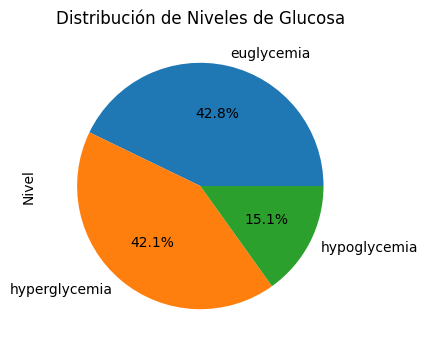

In [136]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [137]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       52834
hyperglycemia    51882
hypoglycemia     18642
Name: Nivel, dtype: int64

In [138]:
with open('dataset/generado/dataset15min/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [139]:
with open('dataset/generado/dataset15min/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [140]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1234
0 889
Program finished in 0.05455449997680262 seconds - using multiprocessing
1 1702
Program finished in 0.04135710000991821 seconds - using multiprocessing
2 2541
Program finished in 0.03924070001812652 seconds - using multiprocessing
3 3319
Program finished in 0.048358700005337596 seconds - using multiprocessing
4 4108
Program finished in 0.05880790000082925 seconds - using multiprocessing
5 5048
Program finished in 0.05104990000836551 seconds - using multiprocessing
6 6078
Program finished in 0.039821800019126385 seconds - using multiprocessing
7 7068
Program finished in 0.05702800001017749 seconds - using multiprocessing
8 8029
Program finished in 0.05730069999117404 seconds - using multiprocessing
9 9047
Program finished in 0.06574829999590293 seconds - using multiprocessing
10 10038
Program finished in 0.07362450001528487 seconds - using multiprocessing
11 10963
Program finished in 0.06891339999856427 seconds - using multiprocessing
12 11908
Program finished in 0.07544280000

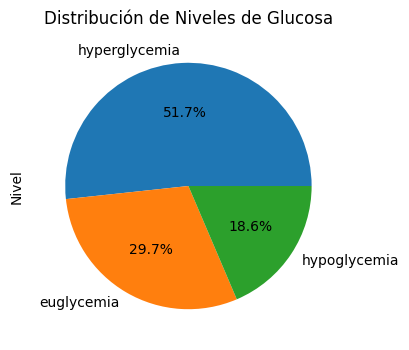

In [141]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [142]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    51882
euglycemia       29830
hypoglycemia     18642
Name: Nivel, dtype: int64

In [143]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1004
0 996
Program finished in 0.027549999998882413 seconds - using multiprocessing
1 1956
Program finished in 0.01649629999883473 seconds - using multiprocessing
2 2930
Program finished in 0.01832759997341782 seconds - using multiprocessing
3 3871
Program finished in 0.022311999986413866 seconds - using multiprocessing
4 4666
Program finished in 0.04048520000651479 seconds - using multiprocessing
5 5386
Program finished in 0.04338240000652149 seconds - using multiprocessing
6 6169
Program finished in 0.047628600033931434 seconds - using multiprocessing
7 6943
Program finished in 0.07143220002762973 seconds - using multiprocessing
8 7715
Program finished in 0.0661619000020437 seconds - using multiprocessing
9 8535
Program finished in 0.05326499999500811 seconds - using multiprocessing
10 9282
Program finished in 0.06148490001214668 seconds - using multiprocessing
11 10068
Program finished in 0.07412419997854158 seconds - using multiprocessing
12 10901
Program finished in 0.067509999964

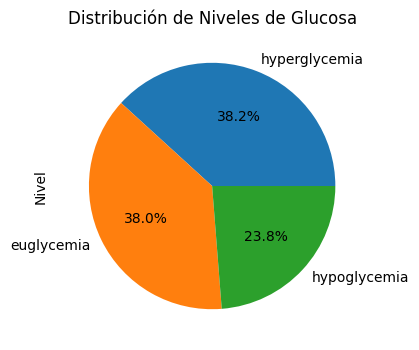

In [144]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [145]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    29999
euglycemia       29830
hypoglycemia     18642
Name: Nivel, dtype: int64

In [146]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [147]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [148]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'rb') as f:
    array_Xval = np.load(f)

In [149]:
len(array_Xval)

78471

In [150]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'rb') as f:
    array_Yval = np.load(f)

In [151]:
len(array_Yval)

78471

In [152]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

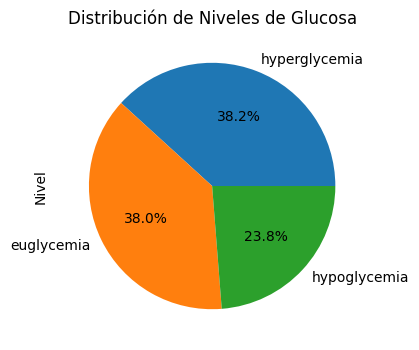

In [153]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [154]:
df_Yval_scaled['Nivel'].value_counts()

hyperglycemia    29999
euglycemia       29830
hypoglycemia     18642
Name: Nivel, dtype: int64

In [155]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

18642

In [156]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [157]:
len(YnewLabel)

67114

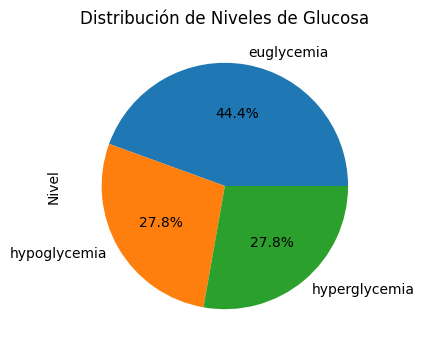

In [158]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [159]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29830
hypoglycemia     18642
hyperglycemia    18642
Name: Nivel, dtype: int64

In [160]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

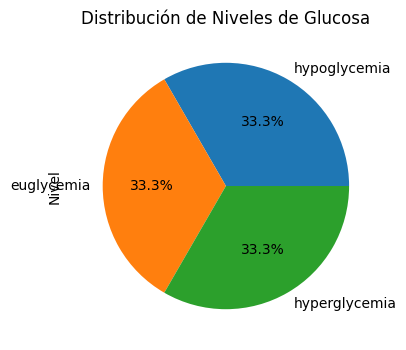

In [161]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [162]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     18642
euglycemia       18642
hyperglycemia    18642
Name: Nivel, dtype: int64

<AxesSubplot: >

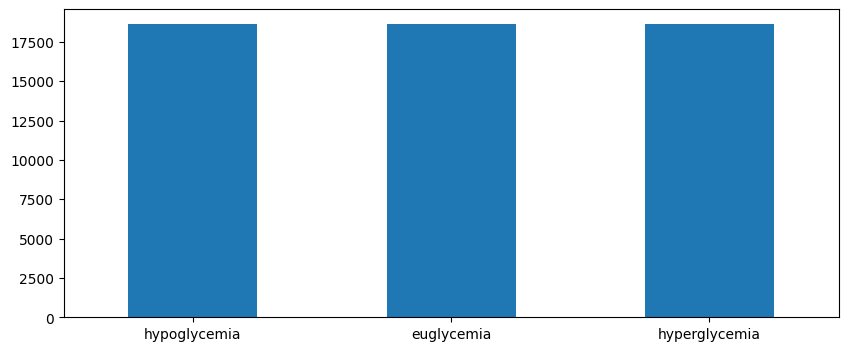

In [163]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [164]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [165]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)